### In this mini project we make model to predict cost of health insurance.
Task performed by group members-
- 1- Tejaswini - Data Cleaning and Exploration 
- 2- Saifali - Visualisation
- 3- Amol - Linear Regression
- 4- Tushar - Polynomial Regression

### Data Cleaning and Exploration

#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Accessing the csv dataset in a dataframe

In [3]:
data= pd.read_csv("insurance.csv")

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### In this data set there are 7 columns. Their names and data types as follows:
- Age-age of the customer
- Sex-gender of the customer
- BMI-Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women
- Children
- Smoker-a person who smokes tobacco regularly.
- Region-give the area wise information of the customer
- Expenses-final cost of the insurance

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.shape

(1338, 7)

#### Looking at these above exploration we understanding:
   - Dataset has 1338 rows and 7 columns.
   - There are features which are categorical in nature but in int and float type.
   - Later analyse and finalize whether to convert them to categorical or treat as integers.

#### Check for Missing Values:

In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#checking for missing values in the colums
round(100*(data.isnull().sum()/len(data)),2).sort_values(ascending = False)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [10]:
#checking for missing values in the rows
round(100*(data.isnull().sum(axis=1)/len(data)),2).sort_values(ascending = False)

0       0.0
898     0.0
896     0.0
895     0.0
894     0.0
       ... 
445     0.0
444     0.0
443     0.0
442     0.0
1337    0.0
Length: 1338, dtype: float64

- There are no missing / Null values either in columns or rows

#### Checking for Redundancy In The Data

In [11]:
data1 = data.copy()

In [12]:
#Checking for duplicates and dropping the entire duplicate row if any
data1.drop_duplicates(subset=None, inplace=True)

In [13]:
data1.shape

(1337, 7)

In [14]:
data.shape

(1338, 7)

The shape after running the drop duplicate command is not same as the original dataframe. Hence we can conclude that there was 1 duplicate value in the dataset.

### Data Cleaning
- Checking value_counts() for entire dataframe.

In [15]:
data1["sex"].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [16]:
data1["smoker"].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [17]:
data1["region"].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

- There seems to be no unknown values in the entire dataset.

### Visualization

#### Visualising Numeric Variables
- Let's make a pairplot of all the numeric variables.

In [18]:
data1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

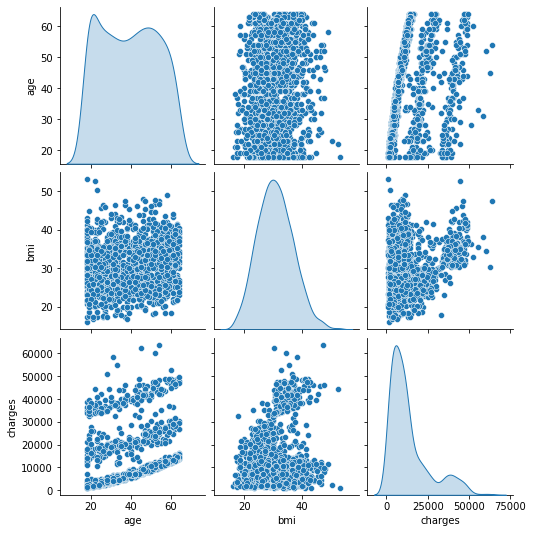

In [19]:
# Create a new dataframe of only numeric variables:

numeric_data = data1[[ "age", "bmi", "charges"]]

sns.pairplot(numeric_data, diag_kind='kde')
plt.show()

- The above PairPlot tells us that there is a ***LINEAR RELATION*** between  **"age" and "charges"** and **"bmi" and "charges"**

- Box plot (refer the fig above) to study their effect on the dependent variable ("charges")

#### Visualising Catagorical Variables

<AxesSubplot:xlabel='sex', ylabel='charges'>

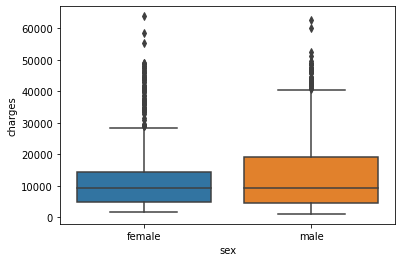

In [20]:
sns.boxplot(x = "sex", y = "charges", data = data1)

- **sex**: data is bit baised towards male , data is represented as 50.5 : 49.5 for male: female . Interquartile range for male is higher compared  to interquartile range for female.

<AxesSubplot:xlabel='children', ylabel='charges'>

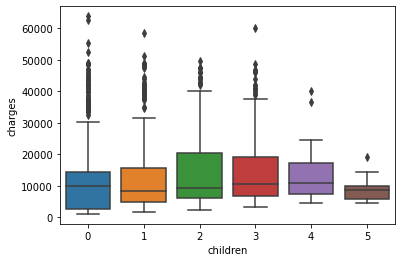

In [21]:
sns.boxplot(x = "children", y = "charges", data = data1)

- **Children** : People have 2 children are having highest data  distribution  between 50 percentile to 75 percentile among all others.

<AxesSubplot:xlabel='smoker', ylabel='charges'>

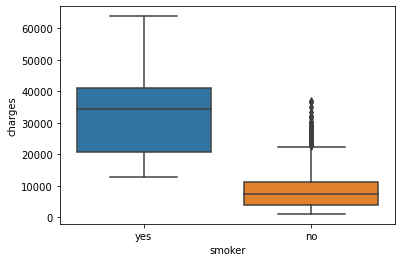

In [22]:
sns.boxplot(x = "smoker", y = "charges", data = data1)

- **smoker**: 20.5 % of our data are smoker. Median for Smokers are quite high compared to people who don't smoke.

<AxesSubplot:xlabel='region', ylabel='charges'>

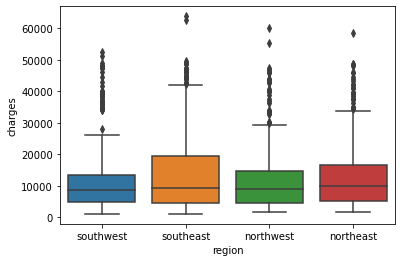

In [23]:
sns.boxplot(x = "region", y = "charges", data = data1)

- **region** : Region as Souteast are having highest data  distribution  between 50 percentile to 75 percentile among all others.

#### Correlation Matrix

- Let's check the correlation coefficients to see which variables are highly correlated. Here we are considering only those variables (dataframe: data1) that were chosen for analysis

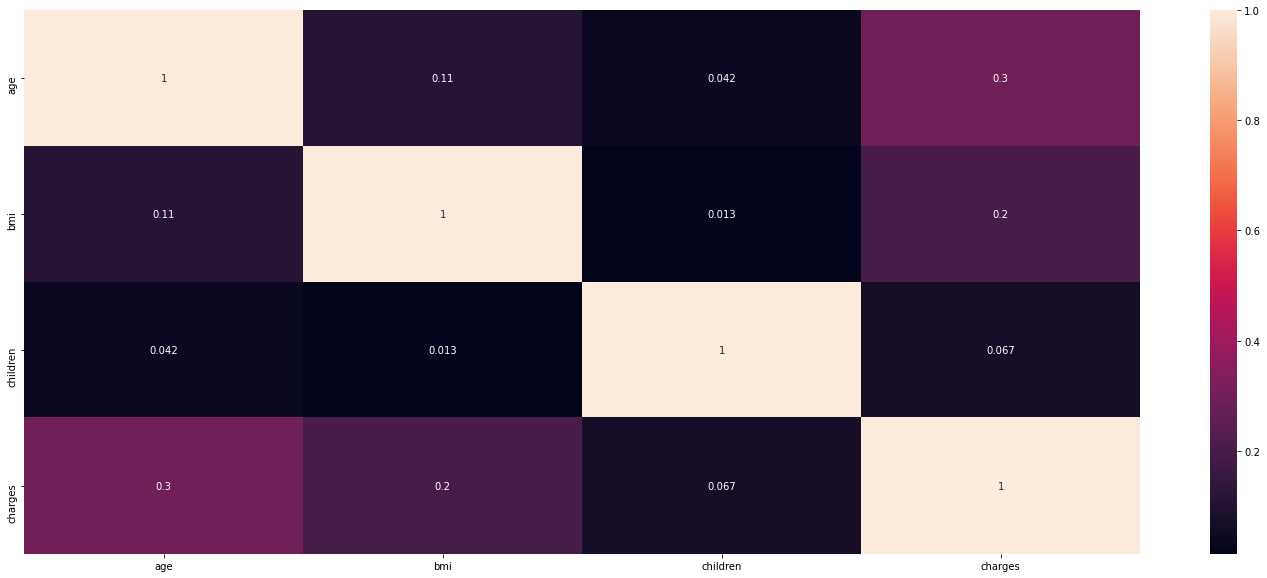

In [24]:
plt.figure(figsize = (25,10))
sns.heatmap(data1.corr(), annot = True)
plt.show()

- The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
- We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF and for identifying the correct variable to select/eliminate from the model.

Text(0, 0.5, 'charges')

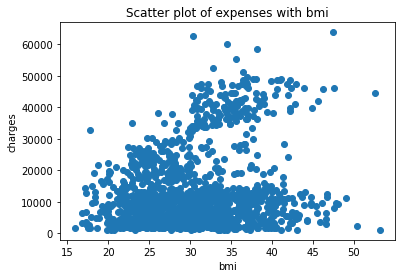

In [25]:
plt.scatter(data['bmi'],data['charges'],alpha=1)
plt.title('Scatter plot of expenses with bmi')
plt.xlabel('bmi')
plt.ylabel('charges')

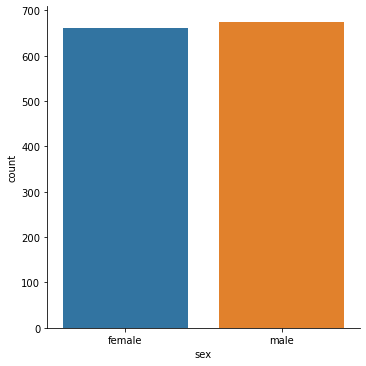

In [26]:
sns.catplot(x = "sex", data = data1, kind = "count")

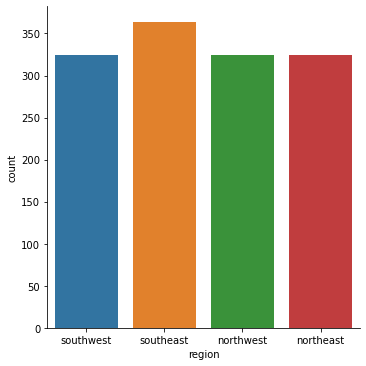

In [27]:
sns.catplot(x = "region",data = data1, kind = "count")

<AxesSubplot:xlabel='age', ylabel='Count'>

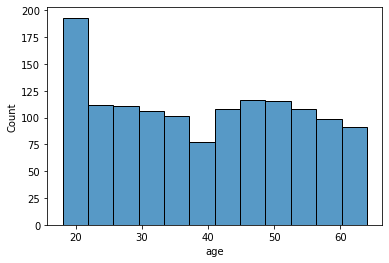

In [28]:
sns.histplot(x = "age",data = data1)

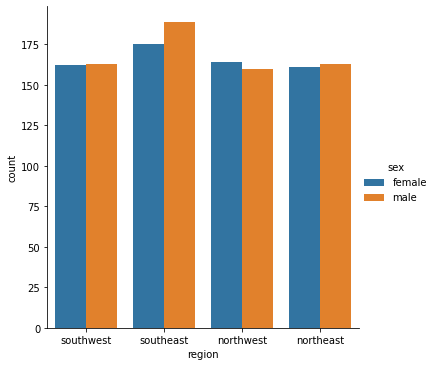

In [29]:
sns.catplot(x = "region", data = data1, kind = "count", hue = "sex")

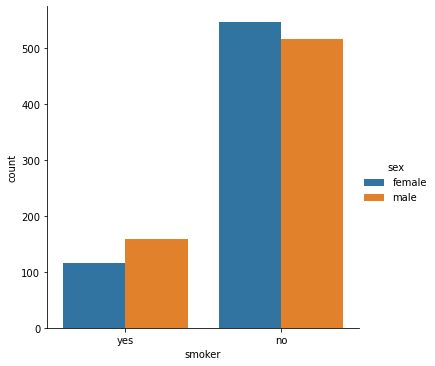

In [30]:
sns.catplot(x = "smoker", data = data1, kind = "count", hue = "sex")

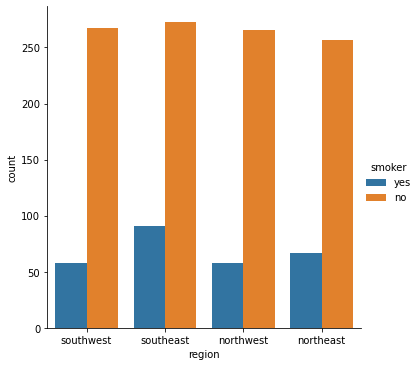

In [31]:
sns.catplot(x = "region", data = data1, kind = "count", hue = "smoker")

### One Hot Encoding

In [32]:
data1["smoker"] = data1["smoker"].map({"no":0,"yes":1})

In [33]:
data1["sex"] = data1["sex"].map({"male":0,"female":1})

In [34]:
new_data = pd.get_dummies(data1)
new_data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


In [35]:
new_data.shape

(1337, 10)

In [36]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   sex               1337 non-null   int64  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   smoker            1337 non-null   int64  
 5   charges           1337 non-null   float64
 6   region_northeast  1337 non-null   uint8  
 7   region_northwest  1337 non-null   uint8  
 8   region_southeast  1337 non-null   uint8  
 9   region_southwest  1337 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 110.6 KB


#### Splitting Train_Test Data

In [37]:
x = new_data.drop(columns = ["charges"])

In [38]:
y = new_data["charges"]

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2)

In [41]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((1069, 9), (1069,), (268, 9), (268,))

### Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [43]:
linear_model = LinearRegression()

In [44]:
linear_model.fit(xtrain,ytrain)
ypred = linear_model.predict(xtest)

In [45]:
print("**************Linear Regression***************")
print("R^2 Value: ",  linear_model.score(xtest,ytest))
print("Intercept: ",  linear_model.intercept_)
#print("Coeffient: ", linear_model.coef_)
p1 = pd.DataFrame({"Actual": ytest,'Predicted':ypred})
p1

**************Linear Regression***************
R^2 Value:  0.6754100763727576
Intercept:  -13532.650269389746


,Actual,Predicted
523,5397.61670,9505.808997
1191,13725.47184,6207.523157
859,10965.44600,10791.731411
410,1621.34020,-2023.710744
864,8782.46900,8265.197705
...,...,...
1134,19673.33573,6255.515097
139,2166.73200,4669.723930
84,39836.51900,33033.516718
1101,11253.42100,11414.444011


In [46]:
def my_model(xtrain, ytrain, xtest, ytest):
    lm = LinearRegression()
    lm.fit(xtrain, ytrain)
    ypred = lm.predict(xtest)
    
    return (lm.score(xtest, ytest)), ypred

In [47]:
def scalling(scaler):
    xtrain_scale= scaler.fit_transform(xtrain)
    xtest_scale = scaler.fit_transform(xtest)
    return xtrain_scale, xtest_scale


### MinMax Scaler

In [48]:
xtrain_scale_value ,xtest_scale_value = scalling(MinMaxScaler())

Rsquare, ypred = my_model(xtrain_scale_value, ytrain, xtest_scale_value, ytest)

In [49]:
print("**************MinMax Scaler***************")
print("R^2 Value: ",Rsquare)
p = pd.DataFrame({"Actaul": ytest,'Predicted':ypred})
p.head()

**************MinMax Scaler***************
R^2 Value:  0.6697668983102354


,Actaul,Predicted
523,5397.61670,9167.193163
1191,13725.47184,5726.059876
859,10965.44600,10367.004722
410,1621.34020,-2543.400807
864,8782.46900,7816.327785


### StandardScaler 

In [50]:
xtrain_scale_value ,xtest_scale_value = scalling(StandardScaler())
Rsquare,ypred = my_model(xtrain_scale_value, ytrain, xtest_scale_value, ytest)

In [51]:
print("**************Standard Scaler***************")
print("R^2 Value: ",Rsquare)
p = pd.DataFrame({"Actaul": ytest,'Predicted':ypred})
p.head()

**************Standard Scaler***************
R^2 Value:  0.6745449216681642


,Actaul,Predicted
523,5397.61670,9761.192889
1191,13725.47184,6281.203053
859,10965.44600,10845.450542
410,1621.34020,-1910.295274
864,8782.46900,8318.507343


### Polynomial Regression

In [52]:
from sklearn.preprocessing import PolynomialFeatures

In [53]:
Polynomial_Features = PolynomialFeatures(degree = 7)

In [54]:
xtrain_poly = Polynomial_Features.fit_transform(xtrain)
xtest_poly = Polynomial_Features.fit_transform(xtest)

In [55]:
linear_model = LinearRegression()
linear_model.fit(xtrain_poly,ytrain)
ypred = linear_model.predict(xtest_poly)
rsquare = linear_model.score(xtrain_poly,ytrain)

In [56]:
print("**************Polynomial Regression***************")
print("R^2 Value: ",rsquare)
d = pd.DataFrame({'Actual':ytest,'Predicted':ypred})
d.head()

**************Polynomial Regression***************
R^2 Value:  0.9651691589919248


,Actual,Predicted
523,5397.61670,10128.995797
1191,13725.47184,30522.423890
859,10965.44600,10515.666940
410,1621.34020,21089.560609
864,8782.46900,4833.974557


#### Conclusion:

Regression analysis a model that describe the relation between the dependent variable and independent variable in a simplified mathematical function will best describe such relationship or simple assumption have made that is the case by using polynomial regression.
After the ***Polynomial Regression analysis of the Data we got the accuracy of the prediction is 95%*** It shows the increment in accuracy of given dataset.